# High level Tensorflow model for MNIST/CIFAR10 classification
After completing the very low level Tensorflow tutorial, we will now implement the Keras approach


In [1]:
# Import all the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Importing and preprocessing the data
As mentioned before, I will be using MNIST and CIFAR10 for this notebook. 
We can use Tensorflow-Keras with the command 'tf.keras.datasets.mnist.load_data()' and download the database online, or we can download it from:
https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
For more detailed information on the MNIST dataset, please refer to [LeCun et al., 1998a] Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998. Also please see http://yann.lecun.com/exdb/mnist/

In a second experiment, we will use the CIFAR10 dataset, which we will download from Alex Krizhevsky website at University of Toronto at https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
For more details of the CIFAR10, dataset please refer to https://www.cs.toronto.edu/~kriz/cifar.html or 
Krizhevsky, A., "LearningMultipleLayersofFeaturesfromTinyImages", 2009, https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

In [2]:
# # Uncomment to use MNIST
# # (x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data('/tf/mydata/mnist.npz')

x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# It is a good idea to visualise the data we just loaded.
print('Train data shape: ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (60000, 28, 28)
Train labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


Train image shape:  (28, 28)


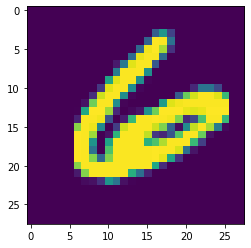

In [4]:
# So, as expected we have 60,000 training images and 10,0000 for testing. What is
# each image shape? Let's find out
print('Train image shape: ', x_train[1].shape)

# Knowing it is a matrix shape, we can randomly show any of the numbers
rnd_idx = np.random.randint(x_train.shape[0])
plt.imshow(x_train[rnd_idx]) #Using astype guarantess imshow work

In [5]:
y_train.shape

(60000,)

In [7]:
# Validate data are numpy arrays
assert (isinstance(x_train, np.ndarray) and isinstance(y_train, np.ndarray)), 'No ndarray'

In [8]:
x_train[:1].shape # In case we need to check the shape of one sample

(1, 28, 28)

## Using Keras Sequential

In this notebook I will show a super simple implementation using high level Keras with automatic eager execution.


In [9]:
# First, let's define the architecture of our FC networks.
# I will start with a 4-Layer vanilla (tasty) FC NN with ReLu activations, weight decay regularization (L2),
# using the number of hidden units given in, well, hidden_units

def four_layer_FC(hidden_units):
    model = tf.keras.models.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28, 28)),
                            tf.keras.layers.Dense(hidden_units[0], activation='relu'),
                            tf.keras.layers.Dense(hidden_units[1], activation='relu'),
                            tf.keras.layers.Dense(hidden_units[2], activation='relu'),
                            tf.keras.layers.Dense(hidden_units[3], activation='softmax')
                            ])
    
    return model

In [11]:
hidden_units = [100, 100, 100, 10]
model = four_layer_FC(hidden_units)

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, batch_size = 64, epochs=10)


model.evaluate(x_test,  y_test, verbose=2)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1271 - accuracy: 0.9630
Epoch 2/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1200 - accuracy: 0.9655
Epoch 3/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1131 - accuracy: 0.9681
Epoch 4/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1074 - accuracy: 0.9696
Epoch 5/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1015 - accuracy: 0.9708
Epoch 6/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0966 - accuracy: 0.9725
Epoch 7/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0918 - accuracy: 0.9732
Epoch 8/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0873 - accuracy: 0.9753
Epoch 9/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0830 - accuracy: 0.9764
Epoch 10/10
60

[0.10119772570095956, 0.9688]

The predicted number is:  7


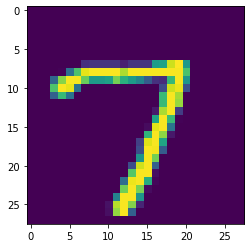

In [22]:
# Let us test the result

hidden_units = [100, 100, 50, 10]

idx = np.random.randint(10000)

plt.imshow(x_test[idx])
print('The predicted number is: ', np.argmax(model.predict(x_test[idx].reshape(1,28,28))))

## Using Keras

In [24]:
batch_size = 64
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(batch_size)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

In [26]:
def four_layer_fc2(x, hidden_units):
    flatten = tf.keras.layers.Flatten(input=x)
    fc1 = tf.keras.layers.Dense(input=flatten, units=hidden_units[0], activation='relu')
    fc2 = tf.keras.layers.Dense(input=fc1, units=hidden_units[1], activation='relu')
    fc3 = tf.keras.layers.Dense(input=fc2, units=hidden_units[2], activation='relu')
    probs = tf.keras.layers.Dense(input=fc3, activation='softmax')
    return probs

It is important to be sure that the model produces an expected output for a given input. Thus, the following step just veryfies that running data through produces a tensor of the expected shape.

In [ ]:
# Help function to test if the inference graph produces the expected output dimensions given an input
# in this case the output should be of shape (N, 10)

def test_FC(num_samples, dataset):
    # Let us declare some useful constants
    if dataset == 'MNIST':
        PIXELS = x_test.shape[1] * x_test.shape[2]
    elif dataset == 'CIFAR10':
        PIXELS = x_test.shape[1] * x_test.shape[2] * x_test.shape[3]
    hidden_units = [100, 100, 100, 10]
    
    # Reset the default graph
    tf.reset_default_graph()
    
    # Define placeholder
    if dataset == 'MNIST':
        x = tf.placeholder(tf.float32, [None, 28, 28])
    else:
        x = tf.placeholder(tf.float32, [None, 32, 32, 3])
    
    # Obtain parameters
    parameters = init_four_layer_FC(PIXELS, hidden_units)
    
    # Add scores to the graph
    scores = four_layer_FC(PIXELS, x, parameters, dataset)
    
    # Create session and run it
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        test = sess.run(scores, feed_dict={x:x_train[:num_samples]})
        print(test.shape)

# Test our model output size
test_FC(10, dataset)

## Build the training model
In this point we will start training our graph. For this we will use a Tensorflow session to run the inference graph and the training operations. This will look similiar to test_FC(), plus the required components to define a loss function and carry out learning step operations. For simplicity let us use vanilla Gradient Descent.

In [ ]:
# This function defines the complete training graph

def train_FC_model(hidden_units, 
                   num_epochs=10,
                   PIXELS=784,
                   learning_rate=0.05,
                   reg=0,
                   print_every=100,
                   minibatch_size = 64):
    '''
    Train Tensorflow model
    
    Inputs:
    - hidden_units: List with number of hidden neurons per layer
    - num_epochs: Integer with the number of epochs to run, an epoch is a complete pass in the whole training set
    - PIXELS: Scalar with total number of pixels
    - learning_rate: Float with the learning rate to use for updates, i.e. the step size towards the minimum
    - reg: L2 regularization strength, default is set to 0 for no regularization
    - print_every: This is a helping variable to stop during training and evaluate loss functions and accuracy
    - minibatch_size: Integer with the number of elements in minibatch
    
    Outputs:
    - updated_parameters: List with update parameters
    '''


    # Reset default graph.
    tf.reset_default_graph()
    
    # Define training data placeholders using expected MNIST data dimensions
    if dataset == 'MNIST':
        x = tf.placeholder(tf.float32, [None, 28, 28], name = 'x_train') # Training data
        y = tf.placeholder(tf.int32,[None, ], name='y_train') # Labels
    elif dataset == 'CIFAR10':
        x = tf.placeholder(tf.float32, [None, 32, 32, 3], name = 'x_train') # Training data
        y = tf.placeholder(tf.int32, [None, ], name = 'y_train') # Training data
    
    
    
    # Add these placeholders to graph in saver, this will allow for easy model restore
    tf.add_to_collection('images', x)
    tf.add_to_collection('labels', y)

    # Load parameters by running the previously defined function
    parameters = init_four_layer_FC(PIXELS, hidden_units)
    
    # Add scores to graph using the function we coded, and the parameters
    scores = four_layer_FC(PIXELS, x, parameters, dataset)
    
    # Save scores to model, this is key since it will allow using it for inference after restore
    tf.add_to_collection('scores', scores)
    
    # Once the scores are computed, we need to obtain our Loss. Given the data, we will use Cross entropy 
    # Using Tensorflow implementation of Cross entropy
    losses = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=scores, labels=y) # Each sample loss
    data_loss = tf.reduce_mean(losses, name='loss') # take minibatch average
    
    # Should we want to use l2 regularization, default is zero, i.e., no regularization
    reg_loss = tf.reduce_mean(reg * (tf.nn.l2_loss(parameters[0])
                                     + tf.nn.l2_loss(parameters[2])
                                     + tf.nn.l2_loss(parameters[4])
                                     + tf.nn.l2_loss(parameters[0])))
    
    loss = data_loss + reg_loss # Compute total loss
    
    # Up to this point we have computed the complete forward pass of the data. 
    # Since, this is 'low level' Tensorflow we need to compute the gradients for the loss 
    # w.r.t. all the learnable parameters. As I said, low level but still Tensorflow. So let's use tf.gradients!
    grad_parameters = tf.gradients(loss, parameters) # Loss gradient w.r.t. parameters

    # We need to update the weights manually, for this we can use tf.assign, or tf.assing_sub
    # Using SGD, we need to update each parameter independently, so list comprehension works well
    updated_parameters = [tf.assign_sub(w, learning_rate * grad)
                          for w, grad in zip(parameters, grad_parameters)]
    
    tf.add_to_collection('weights', updated_parameters)
    
    accuracies = np.zeros(10) # Helping variable to store accuracies
    losses = np.zeros(10) # Helping variable to store accuracies
    
    # Create saver to save the model
    saver = tf.train.Saver()
    # Now, recall we have only created the graph, in order to run it and train, we need a Session
    with tf.Session() as sess:
        # Initialise variables
        sess.run(tf.global_variables_initializer())
        
        # Train the model for num_epochs
        for epoch in range(num_epochs):
            
            print('Epoch number: ', epoch) # Allow us to see what epoch we are running
            
            # Run the necessary iterations given the number of minibatches, this follows the function defined
            # at the beginning of the notebook
            for iteration,(x_mb, y_mb) in enumerate(mini_batches(minibatch_size, x_train, y_train)):
                # The following line calculates the loss for the minibatch.
                # Recall TF knows what is needed to run a function and will run accordinly, e.g. scores before the
                # loss. Also note that we only need to feed the data needed into a placeholder. In this case, we 
                # feed the minibatch training samples and labels
                loss_mb, update_param = sess.run([loss, updated_parameters], feed_dict={x:x_mb, y:y_mb})
                
                # The following condition allows a sanity check by printing accuracies and loss
                if iteration % print_every == 0:
                    # We define this function in the next cell
                    accuracy = compute_accuracy(sess, minibatch_size, scores, x)
                    accuracies[int(iteration/100)]=accuracy # save current accuracy
                    losses[int(iteration/print_every)] = loss_mb
                    print('Iteration: %d Loss: %f Accuracy: %f Learning rate: %f'
                          %(iteration, loss_mb, accuracy, learning_rate))
        
        # We could use learning rate decay. There are several conditions we could test to define when to decay.
        # E.g. we could use it when accuracy is over e.g. 90%, or the loss stays relatively flat
            print('Last losses std: ', np.std(losses))
            if np.std(losses) < 0.80:
                learning_rate = 0.95 * learning_rate
        # Save the 
        saver.save(sess, 'checkpoint_file')
        
    return update_param

In [ ]:
def compute_accuracy(sess, minibatch_size, scores, x):
    '''
    This function computes the accuracy of the current model
    
    Inputs:
    - sess: it needs a current tf.Session to run the scores
    - minibatch_size: The size of the mini batch to run the scores
    - scores: TF operation to run
    - x: test data
    
    Outputs:
    - acc: Accuracy
    
    '''
    num_samples = 0
    num_correct = 0
    for it, (xtest_mb, ytest_mb) in enumerate(mini_batches(minibatch_size, x_test, y_test)):
        scores_test = sess.run(scores, feed_dict={x:xtest_mb})
        y_pred = np.argmax(scores_test, axis=1)

#         In case we would like to compare some elements of the predicted and ground truth arrays
#         if it % 200 == 0:
#             print('y_pred: ', y_pred[:10])
#             print('y_test: ', ytest_mb[:10])

        num_samples += xtest_mb.shape[0]
        num_correct += np.sum(np.equal(y_pred, ytest_mb))
    acc = float(num_correct) / num_samples
    return acc

In [ ]:
# Define number of neurons (units) in each hidden layer
hidden_units = [100, 100, 100, 10]

# Train the model and save weights
updated_parameters =  train_FC_model(hidden_units=hidden_units, 
                                     num_epochs=20,
                                     PIXELS=PIXELS, 
                                     learning_rate=0.005,
                                     minibatch_size=128,
                                     reg= 0.0, 
                                     print_every=100)

In [ ]:
# This instruction is not needed for the tutorial but it is useful to know the variablse in the graph
auxL = [op.name for op in tf.get_default_graph().get_operations() if op.op_def and op.op_def.name=='VariableV2']
print(auxL)

In [ ]:
hidden_units = [100, 100, 100, 10]
if dataset == 'MNIST':
    x = tf.placeholder(tf.float32, [1, 28, 28])
    classes = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five',
              'Six', 'Seven', 'Eight', 'Nine']
elif dataset == 'CIFAR10':
    x = tf.placeholder(tf.float32, [1, 32, 32, 3])
    classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
              'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
#parameters = init_four_layer_FC(784, hidden_units)
# Add scores
scores = four_layer_FC(PIXELS, x, updated_parameters,dataset)    
#eval_op = tf.nn.top_k(scores)

idx = np.random.randint(10000)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    if dataset=='MNIST':
        scores2 = sess.run(scores, feed_dict={x:x_test[idx].reshape(1, 28, 28)})
    else:
        scores2 = sess.run(scores, feed_dict={x:x_test[idx].reshape(1, 32, 32, 3)})
        
    print('The predicted class is: ', classes[np.argmax(scores2)])
    plt.imshow(x_test[idx].astype(np.int32))

## Load the previously trained model

So far we have trained the complete model, computed its accuracy, and validated it with random samples. However, we did the whole process in one go. Since the dataset is relatively simple this is not an issue, nonetheless this would be prohibiting for more complex and larger datasets. Since we saved our trained model, we can just load it and test it.

In [ ]:
if dataset == 'MNIST':
    x = tf.placeholder(tf.float32, [1, 28, 28])
    classes = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five',
              'Six', 'Seven', 'Eight', 'Nine']
elif dataset == 'CIFAR10':
    x = tf.placeholder(tf.float32, [1, 32, 32, 3])
    classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
              'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

with tf.Session() as sess2:
    # Load saved Model
    saver = tf.train.import_meta_graph('checkpoint_file.meta')
    saver.restore(sess2, 'checkpoint_file')
    
    # Load saved points
    # Scores includes the complete model, with final parameters
    scores = tf.get_collection('scores')[0]
    # Saved placeholders, since we only want to run the inference graph, we only load x
    x = tf.get_collection('images')[0]
    
    # Choose radom point in test data
    idx = np.random.randint(10000)
    plt.imshow(x_test[idx].astype(np.int32))
    
    # Calculate the score
    if dataset=='MNIST':
        scores2 = sess2.run(scores, feed_dict={x:x_test[idx].reshape(1, 28, 28)})
    else:
        scores2 = sess2.run(scores, feed_dict={x:x_test[idx].reshape(1, 32, 32, 3)})
        
    print('The predited number is: ', classes[np.argmax(scores2)])
